Resolution vs Ei


In [1]:
cd ~/dv/sns-chops/resolution/CNCS/

/SNS/users/lj7/dv/sns-chops/resolution/CNCS


In [2]:
import numpy as np, os, sys, glob
from matplotlib import pyplot as plt
from mcni.utils import conversion as C

In [18]:
%matplotlib notebook

In [4]:
import pandas as pd
import numpy as np
import scipy as sp
import plotly.plotly as py

# Exp data

In [7]:
sys.path.insert(0, os.path.abspath('./PyChop/'))

In [52]:
import Vdata2018
reload(Vdata2018)

<module 'Vdata2018' from '/SNS/users/lj7/dv/sns-chops/resolution/CNCS/PyChop/Vdata2018.py'>

In [53]:
expdata_highres = Vdata2018.ExpData(os.path.join(Vdata2018.datadir, './V_Cali_Int_Res_HighRes.dat'))
expdata_interm = Vdata2018.ExpData(os.path.join(Vdata2018.datadir, './V_Cali_Int_Res_Intermediate.dat'))
expdata_highflux = Vdata2018.ExpData(os.path.join(Vdata2018.datadir, './V_Cali_Int_Res_HighFlux.dat'))

reading data. please wait...
  done
reading data. please wait...
  done
reading data. please wait...
  done


In [10]:
def sorted_xy_byx(x,y):
    s = np.argsort(x)
    return np.array(x)[s], np.array(y)[s]

# PyChop

In [11]:
sys.path.insert(0, "/SNS/users/lj7/dv")

In [12]:
from PyChop import PyChop2

In [13]:
import PyChop

In [64]:
instrument = PyChop2('PyChop/cncs.yaml')

In [16]:
# instrument.setChopper('High Resolution')
#instrument.getResFlux(Etrans=0, Ei_in=10)

<IPython.core.display.Javascript object>


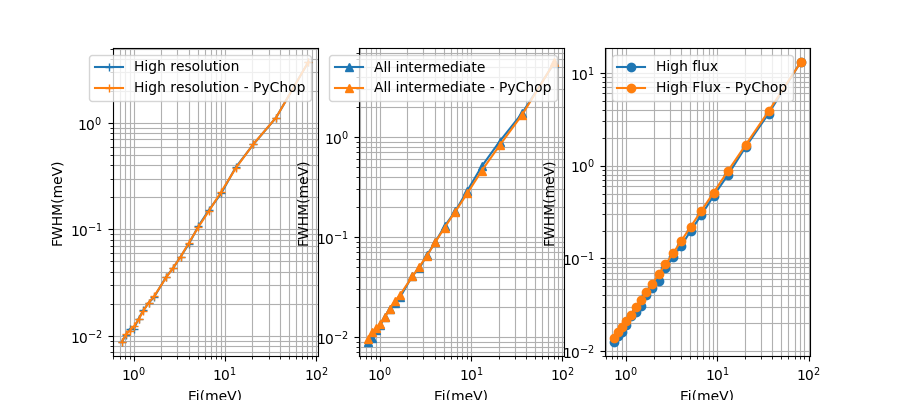

In [19]:
def decorate(ax):
    ax.grid(True, which='minor')
    ax.grid(True, which='major')
    ax.set_xlabel('Ei(meV)')
    ax.set_ylabel('FWHM(meV)')
    ax.legend()
    return

fig, ax = plt.subplots(1, 3, figsize=(9,4))

x,y = sorted_xy_byx(expdata_highres.Ei_list, expdata_highres.FWHM)
ax[0].loglog(x,y, '+-', label='High resolution')
instrument.setChopper('High Resolution')
y_pychop = [instrument.getResFlux(Etrans=0, Ei_in=_, frequency=180.)[0][0] for _ in x]
ax[0].loglog(x,y_pychop, '+-', label='High resolution - PyChop')
decorate(ax[0])

x,y = sorted_xy_byx(expdata_interm.Ei_list, expdata_interm.FWHM)
ax[1].loglog(x,y, '^-', label='All intermediate')
instrument.setChopper('Intermediate')
y_pychop = [instrument.getResFlux(Etrans=0, Ei_in=_,  frequency=240.)[0][0] for _ in x]
ax[1].loglog(x,y_pychop, '^-', label='All intermediate - PyChop')
decorate(ax[1])

x,y = sorted_xy_byx(expdata_highflux.Ei_list, expdata_highflux.FWHM)
ax[2].loglog(x,y, 'o-', label='High flux')
instrument.setChopper('High Flux')
y_pychop = [instrument.getResFlux(Etrans=0, Ei_in=_,  frequency=300.)[0][0] for _ in x]
ax[2].loglog(x,y_pychop, 'o-', label='High Flux - PyChop')
decorate(ax[2])


# plotly

In [59]:
import plotly, plotly.plotly as py, plotly.figure_factory as ff, plotly.graph_objs as go

In [20]:
expdata_highres.vdata

,#,RunNumber,Energy,Ei,Chopper1,Chopper2,Chopper3,Chopper41,Chopper42,Height,FWHM,Sigma,Q
0,0.0,274528.0,0.817451,0.817451,60.0,60.0,60.0,180.0,180.0,0.208409,0.010136,0.004304,0.474735
1,0.0,274529.0,0.741452,0.741452,60.0,60.0,60.0,180.0,180.0,0.164667,0.008749,0.003715,0.452129
2,0.0,274510.0,81.745120,81.745120,60.0,60.0,60.0,180.0,180.0,0.001022,3.743926,1.589778,4.747354
3,0.0,274511.0,36.331164,36.331164,60.0,60.0,60.0,180.0,180.0,0.009120,1.126266,0.478245,3.164903
4,0.0,274512.0,20.436280,20.436280,60.0,60.0,60.0,180.0,180.0,0.055969,0.629437,0.267277,2.373677
5,0.0,274513.0,13.079219,13.079219,60.0,60.0,60.0,180.0,180.0,0.208568,0.381913,0.162171,1.898942
6,0.0,274514.0,9.082791,9.082791,60.0,60.0,60.0,180.0,180.0,0.355508,0.217987,0.092563,1.582451
7,0.0,274515.0,6.673071,6.673071,60.0,60.0,60.0,180.0,180.0,0.353952,0.152146,0.064606,1.356387
8,0.0,274516.0,5.109070,5.109070,60.0,60.0,60.0,180.0,180.0,0.303664,0.107290,0.045559,1.186839
9,0.0,274517.0,4.036796,4.036796,60.0,60.0,60.0,180.0,180.0,1.012678,0.073470,0.031197,1.054968


In [35]:
import collections

In [58]:
exp_datasets = collections.OrderedDict()
exp_datasets['High Resolution'] = expdata_highres
exp_datasets['Intermediate'] = expdata_interm
exp_datasets['High Flux'] = expdata_highflux
chopper_freqs = {
    'High Resolution': 180.,
    'Intermediate': 240.,
    'High Flux': 300.,
}

In [55]:
for i, t in enumerate(exp_datasets):
    print i,t

0 High resolution
1 All intermediate
2 High flux


## plotly: all in one

In [65]:
data =[]
extra_info = dict(
#    chopper_freqs = ('nu', '%sHz')
)

for i, name in enumerate(exp_datasets):
    expdata = exp_datasets[name]
    nrows = len(expdata.Ei_list)
    condition = np.ones(nrows)
    plot = expdata.createPlotXY_on_condition(
        np.ones(nrows, dtype=bool), 'Ei', 'FWHM', extra_info=extra_info)
    plot.name = name
    data.append(plot)
    # pychop
    instrument.setChopper(name)
    freq = chopper_freqs[name]
    y_pychop = [instrument.getResFlux(Etrans=0, Ei_in=_, frequency=freq)[0][0] for _ in expdata.Ei_list]
    x,y = sorted_xy_byx(expdata.Ei_list, y_pychop)
    plot = go.Scatter(x=x, y=y, mode='lines')
    plot.name = 'PyChop %s' % name
    data.append(plot)
    continue

layout = dict(
    title='CNCS resolution', 
    # showlegend=False,
    xaxis=dict(
        title='Incident energy (meV)',
        type='log',
    ),
    yaxis=dict(
        title='Resolutioin (meV)',
        type='log',
    )
)
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='CNCS resolution')

## plotly - dropdown list

In [49]:
data =[]
buttons = []
extra_info = dict(
#    chopper_freqs = ('nu', '%sHz')
)
all_hidden = [False] * len(exp_datasets)

for i, name in enumerate(exp_datasets):
    expdata = exp_datasets[name]
    nrows = len(expdata.Ei_list)
    condition = np.ones(nrows)
    plot = expdata.createPlotXY_on_condition(np.ones(nrows, dtype=bool), 'Ei', 'FWHM', extra_info=extra_info)
    plot.visible = False
    plot.name = name
    data.append(plot)
    # 
    visible = list(all_hidden)
    visible[i] = True
    button =  dict(
        label = name,
        method = 'update',
        args = [{'visible': visible},
                {'title': name,
                }])
    buttons.append(button)
    continue

updatemenus = list([
    dict(active=-1,
         buttons=list(buttons)
        )
])

In [50]:
data[0].visible = True

layout = dict(
    title='CNCS resolution', 
    # showlegend=False,
    updatemenus=updatemenus,
    xaxis=dict(
        title='Incident energy (meV)',
        type='log',
    ),
    yaxis=dict(
        title='Resolutioin (meV)',
        type='log',
    )
)
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='CNCS resolution')